# Aditya Kamble

# Data Science and Business Analytics Intern at " LETSGROWMORE "

# Iris Flowers Classification ML Project 


In [9]:
#Importsnt library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [10]:
#importing and reading data 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url)

In [11]:
print("The data set has been uploaded")
dataset

The data set has been uploaded


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#giving label to data

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
dataset = pd.read_csv(url,names=names)

In [13]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
#printing first 5 rows in dataset

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#checking null values in dataset

dataset.isnull()


,sepal-length,sepal-width,petal-length,petal-width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [16]:
dataset.describe()


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


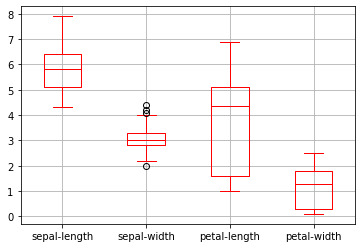

In [17]:
#visulization part checking outliers

dataset.boxplot(color='red')
plt.show()

<AxesSubplot:xlabel='sepal-length', ylabel='Count'>

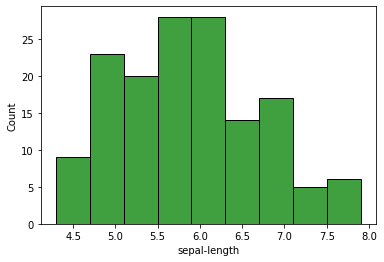

In [18]:
sns.histplot(dataset['sepal-length'],color='green')

<AxesSubplot:xlabel='sepal-width', ylabel='Count'>

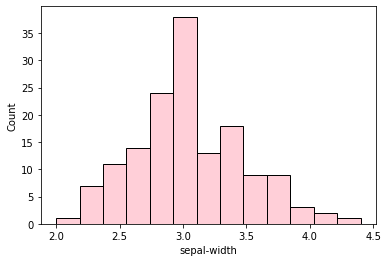

In [19]:
sns.histplot(dataset['sepal-width'],color='pink')


<AxesSubplot:xlabel='petal-length', ylabel='Count'>

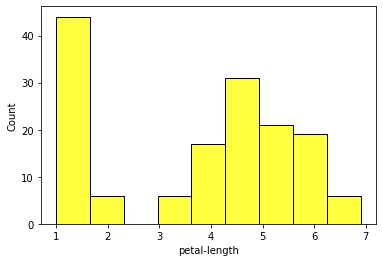

In [20]:
sns.histplot(dataset['petal-length'],color='yellow')

<AxesSubplot:xlabel='petal-width', ylabel='Count'>

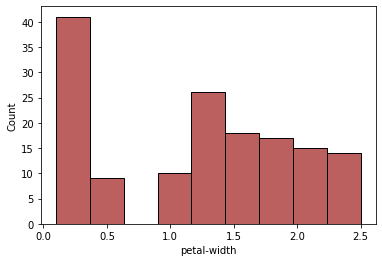

In [21]:
sns.histplot(dataset['petal-width'],color='brown')

In [22]:
#Correlation 
corr_mat = dataset.corr()
print(corr_mat)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


In [23]:
#spiliting data set

train, test = train_test_split(dataset, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [24]:
train_X = train[['sepal-length', 'sepal-width', 'petal-length',
                 'petal-width']]
train_y = train.Species

test_X = test[['sepal-length', 'sepal-width', 'petal-length',
                 'petal-width']]
test_y = test.Species

In [25]:
train_X.head()


,sepal-length,sepal-width,petal-length,petal-width
102,7.1,3.0,5.9,2.1
99,5.7,2.8,4.1,1.3
120,6.9,3.2,5.7,2.3
14,5.8,4.0,1.2,0.2
140,6.7,3.1,5.6,2.4


In [26]:
train_y.head()

102     Iris-virginica
99     Iris-versicolor
120     Iris-virginica
14         Iris-setosa
140     Iris-virginica
Name: Species, dtype: object

In [27]:
#calculating accuracy

#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("accuracy score:",accuracy_score(test_y,y_pred4))

accuracy score: 0.868421052631579


In [28]:
#Using KNN Neighbors

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("accuracy score:",accuracy_score(test_y,y_pred2))

accuracy score: 0.9736842105263158
